In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
brain_body = pd.read_fwf('brain_body.txt')

In [135]:
from sklearn.linear_model import LinearRegression as lr   #basic example using sklearn library

In [4]:
x = brain_body[['Brain']].values
y = brain_body[['Body']].values

In [5]:
lr1 = lr()

In [6]:
lr1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


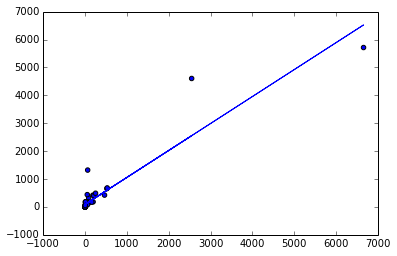

In [7]:
plt.scatter(x,y)
plt.plot(x,lr1.predict(x))
plt.show()

# Scratch Code for Linear Regression

In [29]:
##### Step 1 - read data

In [36]:
points = pd.read_csv('data.csv',header=-1)   #dataframe

points1 = np.genfromtxt('data.csv',delimiter=',')  #numpy array

print points.shape

print points1.shape

(100, 2)
(100, 2)


In [35]:
##### Step 2 - Defining and Initializing Hyperparameters

In [231]:
learning_rate = 0.0000001 #how fast a model should converge i.e. converge to the most optimum result

In [232]:
#here y = mx + b, slope formula of line here since one independent variable and one dependent

In [249]:
initial_b = np.mean(points.iloc[:,-1].values)/2
initial_m = np.mean(points.iloc[:,-1].values)/np.mean(points.iloc[:,:-1].values)
num_iterations = 100000

In [250]:
##### Step 3 - Train the model of Linear Regression

In [251]:
def calc_error(b,m,data):
    y = data.iloc[:,-1].values
    x = data.iloc[:,:-1].values
    if type(m) == np.ndarray:
        mx = np.dot(x,m)
    else:
        mx = x*m
    err_arr = y - mx - b
    sqr_err_arr = np.square(err_arr)
    mean_sqr_err = np.mean(sqr_err_arr)
    return mean_sqr_err

def gradient_descent(data,b_start,m_start,learning_rate,iterations):
    #we descend down the error curve
    b = b_start
    m = m_start
    #now update b and m with new value by performing gradient step process in each iteration
    for i in range(iterations):
        [b,m] = step_gradient(data,b,m,learning_rate)
        #print "iteration:",i,",b:",b,",m:",m,",error:",calc_error(b,m,data)
    return [b,m]

def step_gradient(data,b_current,m_current,learning_rate):
    y = data.iloc[:,-1].values
    x = data.iloc[:,:-1].values
    if type(m_current) == np.ndarray:
        mx = np.dot(x,m_current)
    else:
        mx = x*m_current
    mx = mx.reshape(y.shape)
    err_arr = y - mx - b_current
    m_direction = -2*np.mean(np.dot(err_arr,x))
    b_direction = -2*np.mean(err_arr)
    b = b_current - b_direction*learning_rate
    m = m_current - m_direction*learning_rate
    return [b,m]

In [252]:
print "Starting training at b = {0}, m = {1} and error = {2}".format(initial_b,initial_m,calc_error(initial_b,initial_m,points))
[b,m] = gradient_descent(points,initial_b,initial_m,learning_rate,num_iterations)
print "Ending training at b = {0}, m = {1} and error = {2}".format(b,m,calc_error(b,m,points))

Starting training at b = 36.3675252768, m = 1.48565184976 and error = 1804.88300318
Ending training at b = 36.3459657265, m = 0.765131582123 and error = 330.920858984
